

# Datos actuales del Covid

In [1]:
import pandas as pd
import re
import datetime
import numpy as np
from scipy.integrate import odeint 
import matplotlib.pylab as plt
from scipy.optimize import curve_fit



In [2]:
#Ref: git hub Diego Restrepo
DataSource='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/'
DataFile='master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
cva=pd.read_csv('{}{}'.format(DataSource,DataFile))
cva=cva.reset_index(drop=True)
#Special cases

#DataFile='master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

#cva = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
#cva = cva.reset_index(drop = True)

size = 18
def day_zero(pais):
    data = cva[cva["Country/Region"]==pais]    
    d = data.values[0][4:]
    day_zero = d>0
    d = d[day_zero]
    return d

def graph_covid19(dat, dic):
    n=len(dat)
    plt.figure(figsize = (14,6))
    plt.subplot(121)
    
    for i in range(0,n):
        pais = dic[i]
        plt.plot(dat[i], label = pais)
    plt.xscale("linear")
    plt.yscale("linear")
    plt.xlim(0,80)
    plt.xlabel("dias", fontsize = size)
    plt.ylabel("Casos confirmados", fontsize = size)
    plt.xticks(fontsize = size)
    plt.yticks(fontsize = size)
    plt.legend(fontsize=14)

    plt.subplot(122)
    for i in range(0,n):
        pais = dic[i]
        plt.plot(dat[i], label = pais)  
    plt.xscale("linear")
    plt.yscale("log")
    plt.xlim(0,80)
    plt.xlabel("dias", fontsize = size)
    plt.ylabel("(Log) Casos confirmados", fontsize = size)
    plt.xticks(fontsize = size)
    plt.yticks(fontsize = size)
    plt.legend(fontsize=14)
  

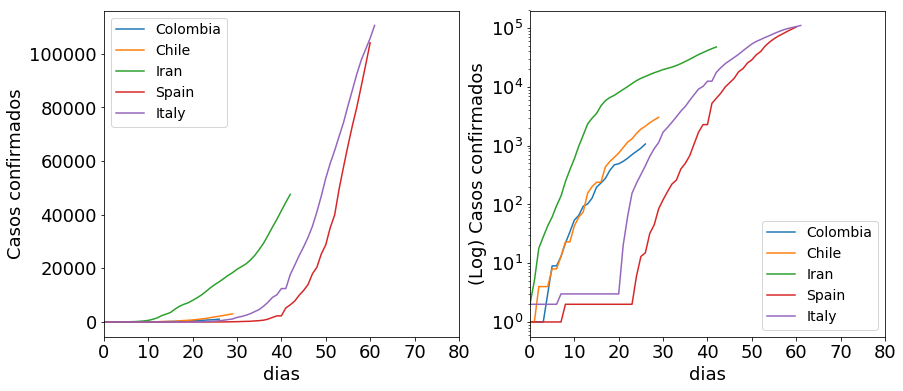

In [3]:
dic={0:"Colombia", 1: "Chile", 2: "Iran", 3: "Spain", 4: "Italy"}# 5: "China"}
dat=[]
for i in range(0, len(dic)):
    dat.append(day_zero(dic[i]))
graph_covid19(dat, dic)

# Model:  exponential function

In [4]:
#Equation for fit 
def fun_exp(x, a, b, c ):
 
    return a * np.exp(b*x)+c 

#Fit exp 
def fit_exp(d):
    
    t1 = np.arange(1, len(d) + 1, 1)
    
    popt, pcov = curve_fit(fun_exp, t1, d)
    
    return popt, pcov


d1     = day_zero(dic[0])    #data for colombia
t  = np.linspace(1, 50, 100) #Tome for fit 
f_col  = fit_exp(d1)         #Fit 
params = f_col[0]            #parametros
t_day  = np.arange(1, len(d1)+1,1 ) #timepos para graficar
#fun_exp(t, *params)
    


<Figure size 432x288 with 0 Axes>

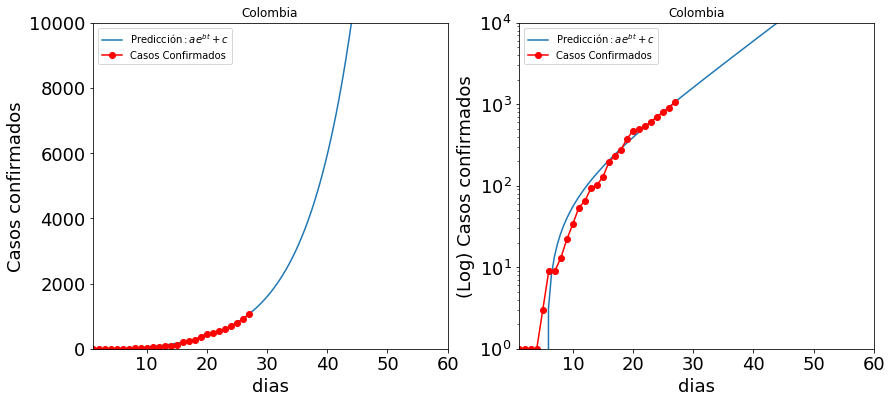

In [5]:
plt.figure()

plt.figure(figsize = (14,6))
plt.subplot(121)
plt.plot(t, fun_exp(t, *params), label = "$\mathrm{Predicción:}ae^{bt} + c$")
plt.plot(t_day, d1, "ro-", label =  "Casos Confirmados")
plt.xscale("linear")
plt.yscale("linear")
plt.xlabel("dias", fontsize = size)
plt.ylabel("Casos confirmados", fontsize = size)
plt.xticks(fontsize = size)
plt.yticks(fontsize = size)
plt.xlim(1, 60)
plt.ylim(1, 10**4)
plt.title("Colombia")
plt.legend()
  

plt.subplot(122)
plt.plot(t, fun_exp(t, *params), label = "$\mathrm{Predicción:}ae^{bt} + c$")
plt.plot(t_day, d1, "ro-", label =  "Casos Confirmados")
plt.xscale("linear")
plt.yscale("log")
plt.xlabel("dias", fontsize = size)
plt.ylabel("(Log) Casos confirmados", fontsize = size)
plt.xticks(fontsize = size)
plt.yticks(fontsize = size)
plt.xlim(1, 60)
plt.ylim(1, 10**4)
plt.title("Colombia")
plt.legend()
 
#plt.ylim(0,10000 )

In [6]:
def doble_tiempo(pais):
    d1     = day_zero(pais)
    B = []
    N = 10
    
    for i in range(N, len(d1)):
        t  = np.linspace(1, 80, 100) #Tome for fit 
        f_col  = fit_exp(d1[0: i])         #Fit 
        b = f_col[0][1]
        B.append(b)
    
    return np.log(2)/(B)

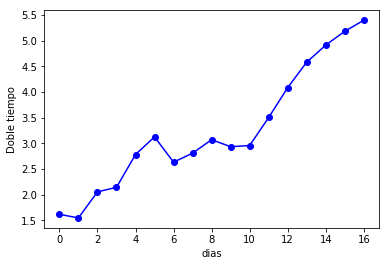

In [7]:
dou_c   = doble_tiempo("Colombia")
plt.figure()
plt.plot(dou_c, "bo-")
plt.xlabel("dias")
plt.ylabel("Doble tiempo")
plt.show()


# Casos Colombia

In [8]:
import pandas as pd
import requests
from datetime import datetime
import numpy as np
r = requests.get('https://infogram.com/covid-2019-ins-colombia-1hnq41zg9ord63z')

#Ref: Diego restrepo git hub

In [9]:
#import wget
#url = "https://infogram.com/#"
#wget.download(url, 'c:/users/LikeGeeks/downloads/pythonLogo.png')

In [10]:
head = '"data":[[["ID de caso",'
tail = ']]]'
js = '{}{}{}'.format( head.split(':')[-1],
                 r.text.split(head)[-1].split(tail)[0],
                 tail
             )

df = pd.read_json(js)

data=pd.DataFrame([l for l in df[range(1,df.columns[-1]+1)].values[0]],columns=df[0][0] )

#data
#data[450:480]
#
F=data!=""
data=data[F]
data = data.replace({pd.np.nan: None})


In [11]:
data.tail()

,ID de caso,Fecha de diagnóstico,Ciudad de ubicación,Departamento o Distrito,Atención**,Edad,Sexo,Tipo*,País de procedencia
1060,1061,01/04/2020,Bogotá,Bogotá D.C.,Hospital,47,F,En estudio,Colombia
1061,1062,01/04/2020,Bogotá,Bogotá D.C.,Hospital,60,F,En estudio,Colombia
1062,1063,01/04/2020,Bogotá,Bogotá D.C.,Casa,33,F,Relacionado,Colombia
1063,1064,01/04/2020,Bogotá,Bogotá D.C.,Hospital UCI,33,M,En estudio,Colombia
1064,1065,01/04/2020,Santa Rosa de Osos,Antioquia,Casa,32,F,Importado,Panamá


In [12]:
for i, d in enumerate(data["ID de caso"].values):
    if (d == None):
        l=i
        break 
print(i)        
data=data[0:i]

1064


In [13]:
data.tail()

,ID de caso,Fecha de diagnóstico,Ciudad de ubicación,Departamento o Distrito,Atención**,Edad,Sexo,Tipo*,País de procedencia
1059,1060,01/04/2020,Bogotá,Bogotá D.C.,Casa,47,M,Relacionado,Colombia
1060,1061,01/04/2020,Bogotá,Bogotá D.C.,Hospital,47,F,En estudio,Colombia
1061,1062,01/04/2020,Bogotá,Bogotá D.C.,Hospital,60,F,En estudio,Colombia
1062,1063,01/04/2020,Bogotá,Bogotá D.C.,Casa,33,F,Relacionado,Colombia
1063,1064,01/04/2020,Bogotá,Bogotá D.C.,Hospital UCI,33,M,En estudio,Colombia


In [14]:
"""
Rutina con el estado de cada columna
"""
def dic_ele(estados):
  
    estados = sorted(estados) 
    
    last_state = estados[0] #Inicializamos con el primer estado
    List_estados = []       #lista de estados 
    
    for estado in estados:      
        if(estado == last_state):   #Search  no repeat states
            continue
        else: 
            List_estados.append(last_state)
            last_state = estado
    List_estados.append(last_state) #Para incluir el ultimo estado.
    
    l = np.arange(0, len(estados), 1)
    d = dict(zip(l, List_estados))
    
    return d

#pandas data frame for state, only for realized comparison 

L = []
N = []
for state in data.columns[1:]:
    L.append(dic_ele(data[state].values))
    N.append(state)
    
ref=dict(zip(N, L))
data_ref = pd.DataFrame(ref)    #Data frame the reference
data_ref = data_ref.replace({pd.np.nan: None})



In [15]:
ref_date = data_ref["Fecha de diagnóstico"].values
ref_date=  ref_date[ref_date!=None]
data_ref

,Fecha de diagnóstico,Ciudad de ubicación,Departamento o Distrito,Atención**,Edad,Sexo,Tipo*,País de procedencia
0,01/04/2020,Anapoima,Antioquia,Casa,0,F,En estudio,Alemania
1,06/03/2020,Apartadó,Atlántico,Fallecido,1,M,Importado,Alemania - Estambul
2,09/03/2020,Arjona,Barranquilla D.E.,Hospital,12,None,Relacionado,Argentina
3,11/03/2020,Armenia,Bogotá D.C.,Hospital UCI,13,None,None,Aruba
4,12/03/2020,BUCARAMANGA,Bolívar,Recuperado,15,None,None,Brasil
5,13/03/2020,Barbosa,Boyacá,None,16,None,None,Bélgica
6,14/03/2020,Barranquilla,Caldas,None,17,None,None,Canadá
7,15/03/2020,Bello,Cartagena D.T. y C.,None,18,None,None,Chile
8,16/03/2020,Bogotá,Casanare,None,19,None,None,Chile - Estados Unidos
9,17/03/2020,Bucaramanga,Cauca,None,2,None,None,Colombia


In [16]:
#data_ref.style.background_gradient(cmaps)

In [17]:
def infec_ciudad(data, ref_date , ciudad):
    """
    Determina el numero de infectados por ciudad
    """
    med = data[data["Ciudad de ubicación"]==ciudad]
    med = med.reset_index(drop = True)


    #for date_ref in data_ref:
    Bool = []
    inf_d = []
    inf_a = []
    k = 0
    for i in range(0, len(ref_date)):
        bol = med["Fecha de diagnóstico"] == ref_date[i] # Identificar las fechas
        l=len(med["Fecha de diagnóstico"][bol])           # Numeros de casos verdaderos
        inf_d.append(l)                                   #infectados por dia
    
        k = l + k                                          #infectados acumulado
        inf_a.append(k)                                    #infectados

    return inf_d, inf_a, 

In [18]:
fechas = data["Fecha de diagnóstico"].values
d0 = datetime.strptime(fechas[0], '%d/%m/%Y') #Fecha de inicio 
d1 = datetime.strptime(fechas[-1],'%d/%m/%Y') #Fecha de fin
days = d1 - d0 #count of day with infect number one in Medellin 
#delta = timedelta(days=1)

med = infec_ciudad(data, ref_date,"Medellín")
bog = infec_ciudad(data, ref_date,"Bogotá")
cali = infec_ciudad(data, ref_date,"Cali")
Rio = infec_ciudad(data, ref_date,"Rionegro")
Sab=infec_ciudad(data, ref_date,"Sabanedota")
Bello=infec_ciudad(data, ref_date,"Bello")
Barbosa=infec_ciudad(data, ref_date,"Barbosa")
Envigado=infec_ciudad(data, ref_date,"Envigado")

med2 = np.array([Envigado]) + np.array([Bello]) + np.array([Sab]) + np.array([med])


In [19]:
#Fit Colombia
#Equation for fit 
def fun_exp(t, N,  t0 , c, b):
    return N * np.exp(b*(t))+c

#Fit exp 
def fit_exp(d):
    
    t1 = np.arange(1, len(d) + 1, 1)
    
    popt, pcov = curve_fit(fun_exp, t1, d)
    
    return popt, pcov

def fit(t, data_ciudad):
    med=data_ciudad

    f_med  = fit_exp(med)         #Fit 
    params = f_med[0]            #parametros
    return params

t  = np.linspace(1, 40, 100) #Tome for fit 
params_med = fit(t, med2[0][1])
params_bog = fit(t, bog[1])
params_cal = fit(t, cali[1])

/usr/local/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


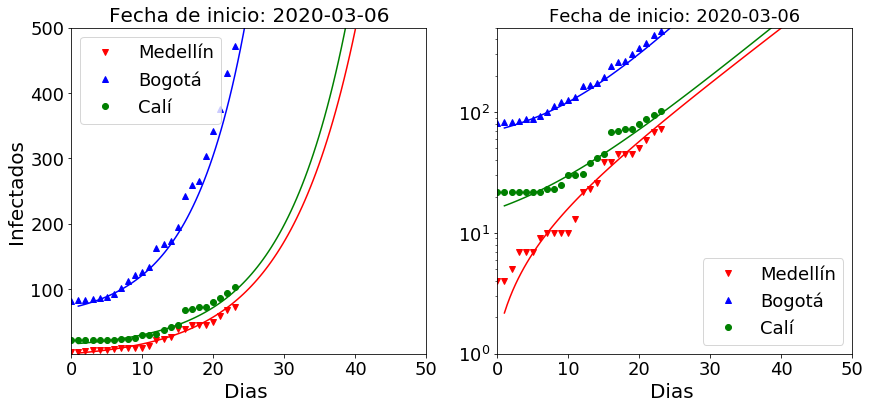

In [20]:
size=18
plt.figure(figsize=(14, 6))

plt.subplot(121)
plt.plot(med[1], "rv",  label="Medellín")
plt.plot(t, fun_exp(t, *params_med), "r-" )
plt.plot(bog[1], "b^",  label="Bogotá")
plt.plot(t, fun_exp(t, *params_bog), "b-" )
plt.plot(cali[1], "go",label="Calí")
plt.plot(t, fun_exp(t, *params_cal), "g-" )
plt.xlabel("Dias ", fontsize=20)
plt.ylabel("Infectados", fontsize=20)
plt.title("Fecha de inicio: "+str(d0.date())+"",  fontsize=20)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.xlim(0, 50)
plt.ylim(1, 500)
plt.legend(fontsize=size, loc=2)


#plt.show()
plt.subplot(122)
plt.plot(med[1], "rv",  label="Medellín")
plt.plot(t, fun_exp(t, *params_med), "r-" )
plt.plot(bog[1], "b^",  label="Bogotá")
plt.plot(t, fun_exp(t, *params_bog), "b-" )
plt.plot(cali[1], "go",label="Calí")
plt.plot(t, fun_exp(t, *params_cal), "g-" )
plt.xlabel("Dias ", fontsize=20)
plt.title("Fecha de inicio: "+str(d0.date())+"",  fontsize=size)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.xscale("linear")
plt.yscale("log")
plt.xlim(0, 50)
plt.ylim(1, 500)
plt.legend(fontsize=size, loc="best")
plt.show()

In [21]:
F = data["Departamento"].values=="Antioquia"
antioquia = data[F]

antioquia["Ciudad de ubicación"]

KeyError: 'Departamento'

In [62]:
def infec_ciudad(data, ref_date , ciudad):
    """
    Determina el numero de infectados por ciudad
    """
    med = data[data["Ciudad de ubicación"]==ciudad]
    med = med.reset_index(drop = True)


    #for date_ref in data_ref:
    Bool = []
    inf_d = []
    inf_a = []
    k = 0
    for i in range(0, len(ref_date)):
        bol = med["Fecha de diagnóstico"] == ref_date[i] # Identificar las fechas
        l=len(med["Fecha de diagnóstico"][bol])           # Numeros de casos verdaderos
        inf_d.append(l)                                   #infectados por dia
    
        k = l + k                                          #infectados acumulado
        inf_a.append(k)                                    #infectados

    return inf_d, inf_a, 

In [63]:
antioquia.head()

,ID de caso,Fecha de diagnóstico,Ciudad de ubicación,Departamento,Atención**,Edad,Sexo,Tipo*,País de procedencia
2,3,09/03/2020,Medellín,Antioquia,Recuperado,50 a 59,F,Importado,España
3,4,11/03/2020,Medellín,Antioquia,En casa,50 a 59,M,Relacionado,Colombia
4,5,11/03/2020,Medellín,Antioquia,Recuperado,20 a 29,M,Relacionado,Colombia
5,6,11/03/2020,Itagüí,Antioquia,En casa,20 a 29,F,Relacionado,Colombia
19,20,14/03/2020,Medellín,Antioquia,En casa,20 a 29,F,Relacionado,Colombia


med

In [48]:
atencion={0: "recuperado", 1: "casa", 2: "hospital", 3:"fallecido"}
Tipo={0: "importado", 1: "Relacionado"}
med = coco[coco["Ciudad de ubicación"]=="Bogotá"]

NameError: name 'coco' is not defined

In [ ]:
coco["Atención"].values=="casa"
coco["Atención"].values=="hospital"

In [219]:
dir = {"0 a 9": -1, "10 a 19": 0, 
       "20 a 29": 1, "30 a 39": 2, 
       "40 a 49": 3, "50 a 59": 4, 
       "60 a 69": 5, "70 a 79": 6, 
       "80 a 89": 7, "60 a  69":5 }


In [220]:
edad = coco["Edad"].values 
f = []
for e in edad:
    #print (e)
    f.append(dir[e])


In [221]:
dir_sex={"F":0, "M":1}
dir_type={"Importado":0, "Relacionado":1, "En estudio":2}

sexo = coco["Sexo"].values 
tipo = coco["Tipo*"].values

f1 = []
for e in edad:
    f1.append(dir[e])


In [222]:
f1 = []
for t in tipo: 
#    print(t)
    f1.append(dir_type[t])

(array([121.,   0.,   0.,   0.,   0.,  67.,   0.,   0.,   0.,   1.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

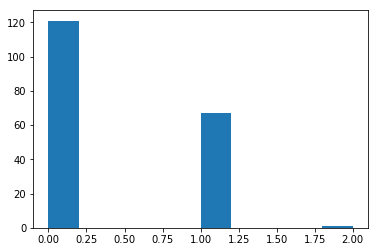

In [223]:
plt.hist(f1)

(array([121.,  68.]), array([0., 1., 2.]), <a list of 2 Patch objects>)

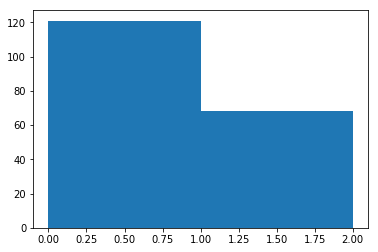

In [224]:
plt.hist(f1, bins=2)